# Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data
df = pd.read_csv('speech100.csv')

In [4]:
#（1）VADER from nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adm\AppData\Roaming\nltk_data...


True

In [7]:
#Polarity of 100 speeches
sia = SIA()
senti = []
for i in np.arange(len(df)):
    content = df.Doc[i]
    sen = sia.polarity_scores(content)
    senti.append([sen['neg'],sen['neu'],sen['pos'],sen['compound']])
senti_polar = pd.DataFrame(senti,columns=['neg','neu','pos','compound'])
senti_polar

,neg,neu,pos,compound
0,0.095,0.708,0.197,0.9997
1,0.131,0.683,0.186,0.9988
2,0.098,0.710,0.192,0.9997
3,0.108,0.779,0.112,0.5117
4,0.093,0.763,0.143,0.9984
...,...,...,...,...
95,0.092,0.731,0.177,0.9993
96,0.071,0.833,0.096,0.9891
97,0.068,0.783,0.149,0.9994
98,0.084,0.734,0.182,0.9999


##  vader plot the distribution of polarity of 100 speeches

(-1.0, 1.0)

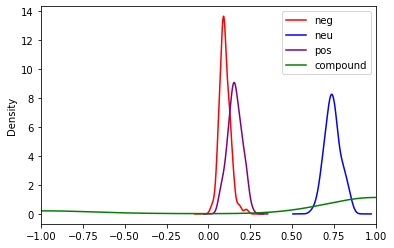

In [8]:
#plot the distribution of polarity of 100 speeches
senti_polar.plot.kde(color=['red','blue','purple','green'])
plt.xlim(-1,1)
#most of speeches are neutral 

In [9]:
#define the function to split the text into 12 parts
import math
def contents_split(content,n):
    num = len(content)
    part = math.floor(num/n)
    b = np.arange(0,num,part)
    seg = []
    for i in range(n):
        seg.append(content[b[i]:b[i]+part])
    return seg

In [10]:
#define the function to plot the polarity of contents
def contents_polarity(content):
    segs=contents_split(content,12)
    senti = []
    for seg in segs:
        sen = sia.polarity_scores(seg)
        senti.append([sen['neg'],sen['neu'],sen['pos'],sen['compound']])
    senti_polar = pd.DataFrame(senti,columns=['neg','neu','pos','compound'])
    plt.plot(senti_polar.index,senti_polar['compound'])
    plt.ylabel('Polarity')

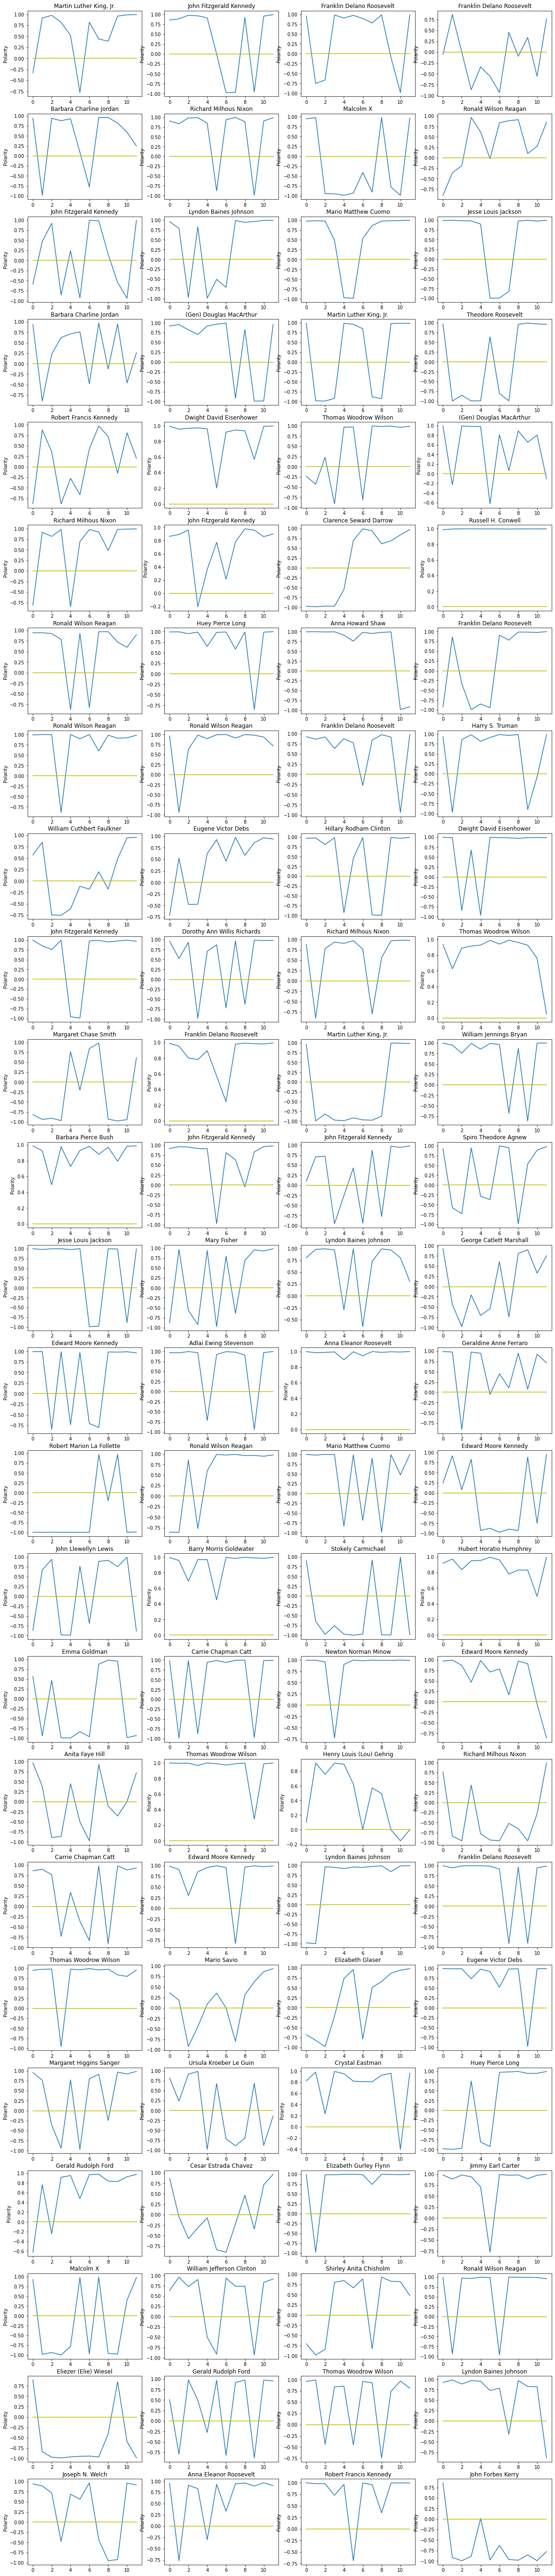

In [11]:
plt.rcParams['figure.figsize'] = [20, 100]
num_speech = 100
for i in range(num_speech):
    txt = df.Doc[i]
    plt.subplot(num_speech//4,4,i+1)
    contents_polarity(txt)
    plt.plot(np.arange(0,12), np.zeros(12),color='y')
    plt.title(df.Lecturer[i])
plt.show()

In [12]:
# Overall Trend
total_polarity=[]
for i in np.arange(0,len(df.Doc)):
    segs = contents_split(df.Doc[i],12)
    senti = []
    for seg in segs:
        sen = sia.polarity_scores(seg)
        senti.append(sen['compound'])
    total_polarity.append(senti)
total_pol = pd.DataFrame(total_polarity,columns=np.arange(0,12))
total_pol['Contents']=np.arange(0,100)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

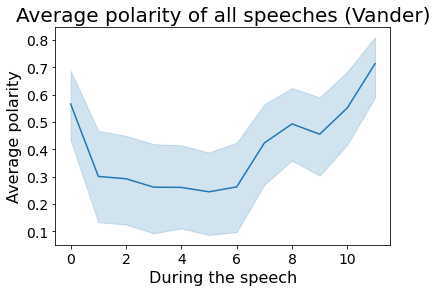

In [13]:
# Melt df (for sns lineplot 95% confidence interval)
total = pd.melt(total_pol, id_vars='Contents')

# sns lineplot
fig,ax = plt.subplots(figsize=[6,4])
sns.lineplot(data=total, x="variable", y="value")
ax.set_title('Average polarity of all speeches (Vander)',fontsize=20)
ax.set_ylabel('Average polarity',fontsize=16)
ax.set_xlabel('During the speech',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Textblob for Sentiment Analysis

In [14]:
# Textblob for Sentiment Analysis

In [15]:
#Calculate the polarity and subjectivity of 100 speeches
from textblob import TextBlob
df['polarity'] = df.Doc.apply(lambda x : TextBlob(x).sentiment.polarity)
df['subjectivity'] = df.Doc.apply(lambda x : TextBlob(x).sentiment.subjectivity)

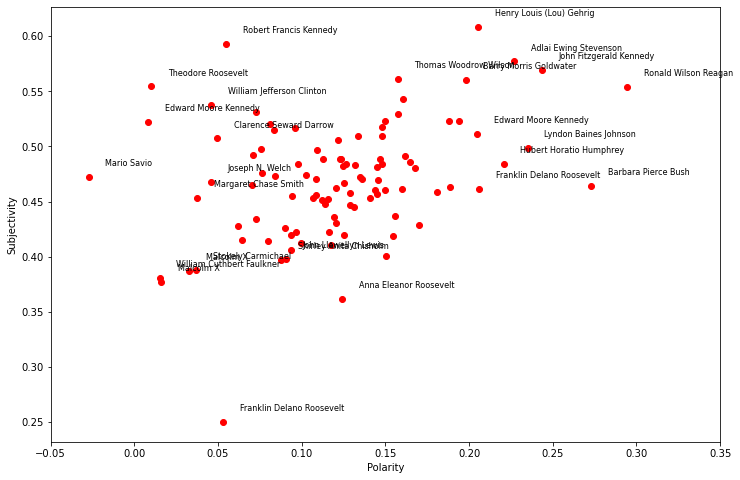

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
for i in np.arange(0,100):
    x = df.polarity[i]
    y = df.subjectivity[i]
    plt.scatter(x,y,color='r')
    if (x>0.2)|(x<0.05)|(y>0.55)|(y<0.4):
        plt.text(x+0.01,y+0.01,df.Lecturer[i],fontsize=8)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.xlim(-0.05,0.35)
# Most speeches are of moderate polarity and subjectivity

In [17]:
#define the function to calculate the polarity in the content using textblob
def contents_polarity_tb(content):
    segs=contents_split(content,12)
    senti = []
    for seg in segs:
        sen = TextBlob(seg).sentiment.polarity
        senti.append(sen)
    senti_polar = pd.DataFrame(senti,columns=['polarity'])
    plt.plot(senti_polar.index,senti_polar['polarity'])
    plt.ylabel('Polarity')

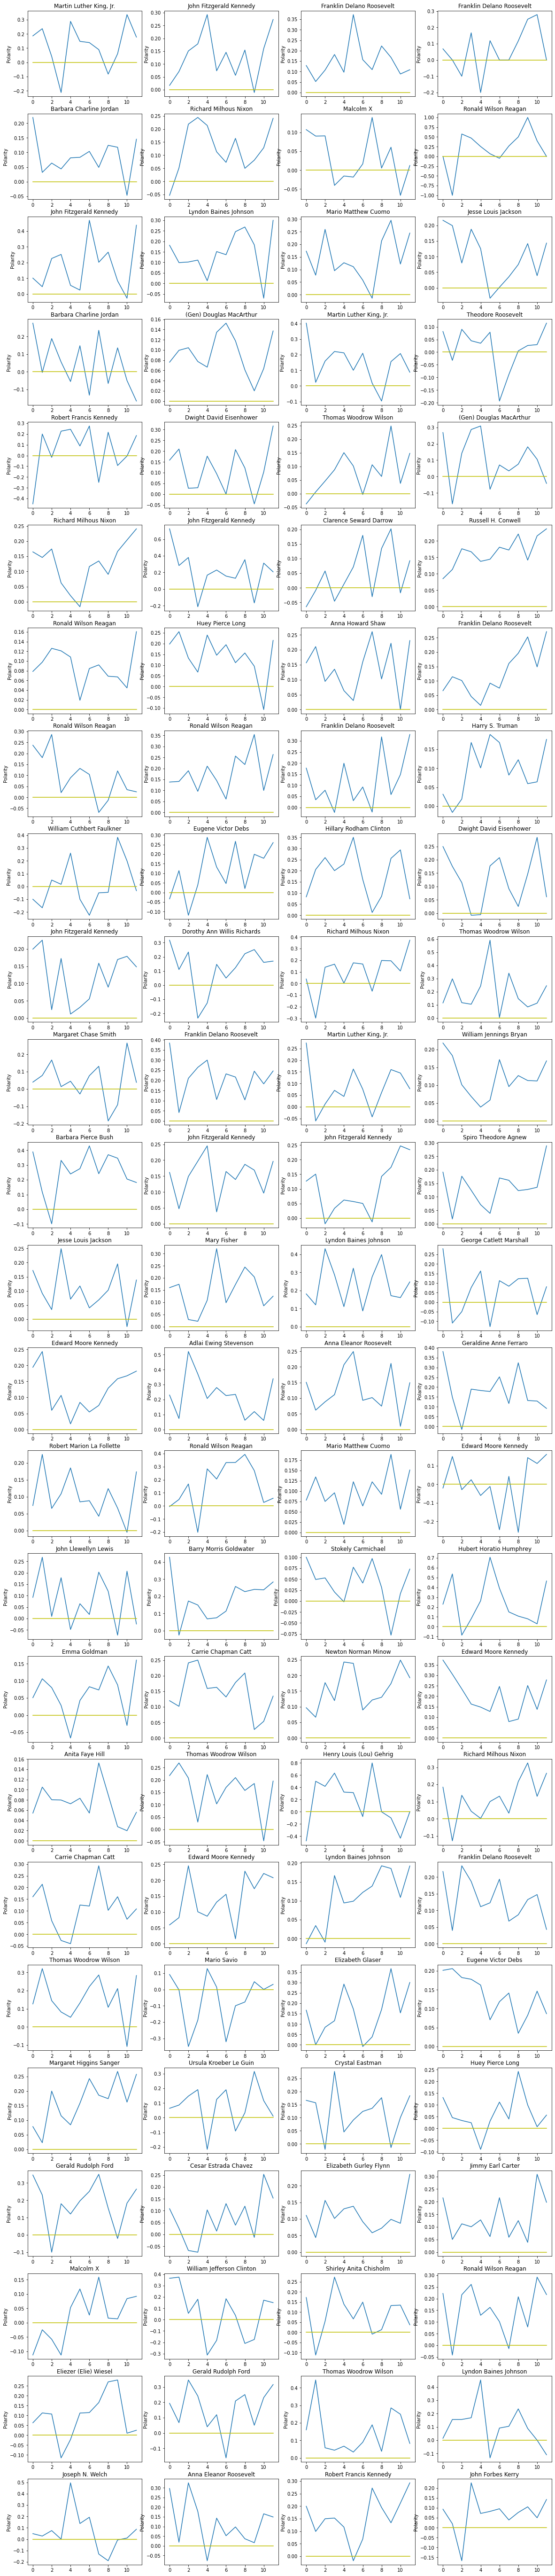

In [18]:
plt.rcParams['figure.figsize'] = [20, 100]

num_speech = 100
for i in range(num_speech):
    txt = df.Doc[i]
    plt.subplot(num_speech//4,4,i+1)
    contents_polarity_tb(txt)
    plt.plot(np.arange(0,12), np.zeros(12),color='y')
    plt.title(df.Lecturer[i])    
plt.show()

In [19]:
# Overall Trend
total_polarity_tb=[]
for i in np.arange(0,len(df.Doc)):
    segs = contents_split(df.Doc[i],12)
    senti = []
    for seg in segs:
        sen = TextBlob(seg).sentiment.polarity
        senti.append(sen)
    total_polarity_tb.append(senti)
total_pol_tb = pd.DataFrame(total_polarity_tb,columns=np.arange(0,12))
total_pol_tb['Contents'] = np.arange(0,100)

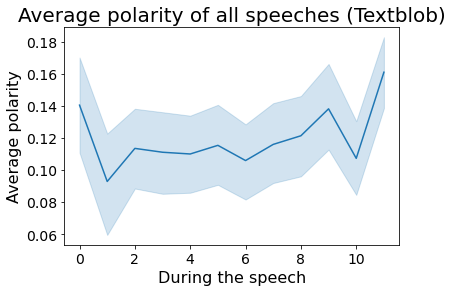

In [20]:
# Melt df (for sns lineplot 95% confidence interval)
total_tb = pd.melt(total_pol_tb, id_vars='Contents')

# sns lineplot
fig,ax = plt.subplots(figsize=[6,4])
sns.lineplot(data=total_tb, x="variable", y="value")
ax.set_title('Average polarity of all speeches (Textblob)',fontsize=20)
ax.set_ylabel('Average polarity',fontsize=16)
ax.set_xlabel('During the speech',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Comparing 2 plots of Average Polarity of all speeches using Vander and Textblob, we will find the curve generated by Vander is smoother than that by Textblob and it shows a more drastic tendency since the curve generated by Textblob oscillate around 0.11 except the beginning and the ending.

We will use vander for further analysis

##  party

In [33]:
df = pd.read_csv(r'speech_100_topic.csv')

In [34]:
# Overall Trend of different Parties
def subana1(column,target):
        total_polarity=[]
        df_sub = df[df[column]==target]
        for i in np.arange(0,len(df_sub.Doc)):
            segs = contents_split(df.Doc[i],12)
            senti = []
            for seg in segs:
                sen = sia.polarity_scores(seg)
                senti.append(sen['compound'])
            total_polarity.append(senti)
        total_pol = pd.DataFrame(total_polarity,columns=np.arange(0,12))
        total_pol['Contents']=np.arange(0,len(df_sub))
        total = pd.melt(total_pol, id_vars='Contents')
        sns.lineplot(data=total, x="variable", y="value")
        ax.set_ylabel('Average polarity',fontsize=16)
        ax.set_xlabel('During the speech',fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

##  race

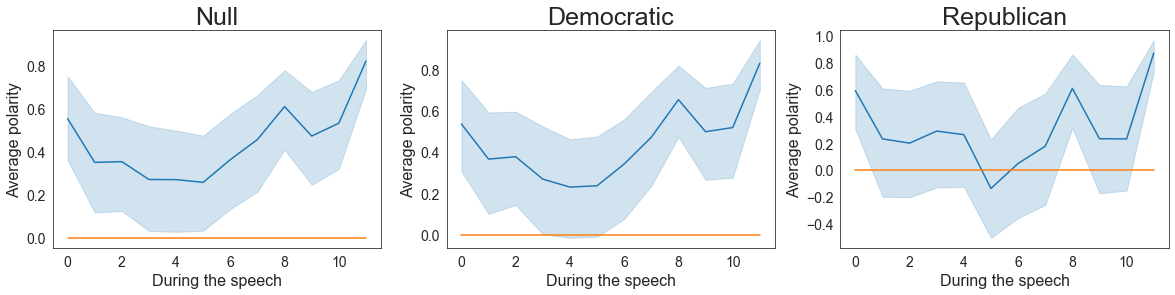

In [23]:
plt.rcParams['figure.figsize'] = [20, 4]
sns.set_style("white")

num_plot = 3
categories = df.party.unique()

figure, axes = plt.subplots(1,3)

for i in range(num_plot):    
    plt.subplot(1,3,i+1)
    subana1('party',categories[i])
    plt.plot(np.arange(0,12), np.zeros(12))
    plt.xlabel('During the speech',fontsize=16)
    plt.ylabel('Average polarity',fontsize=16)
    plt.title(categories[i], fontdict = {'fontsize' : 25})    
plt.show()

## Topic

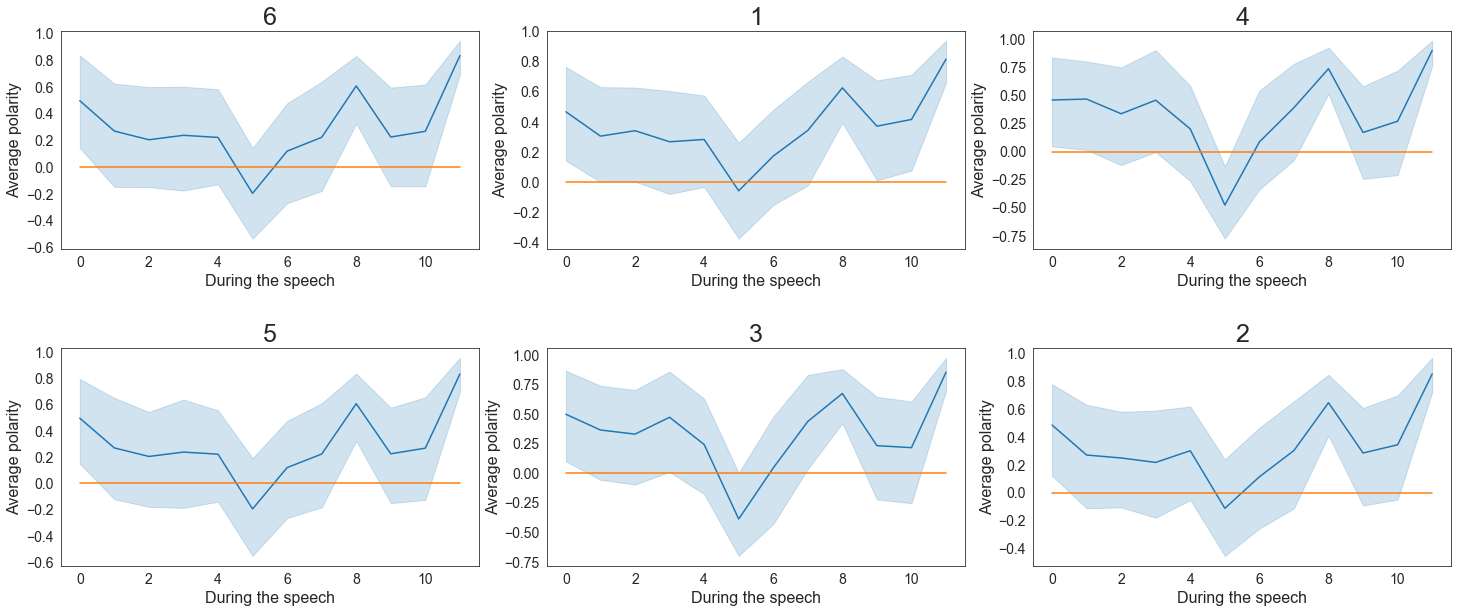

In [35]:
#Topic
plt.rcParams['figure.figsize'] = [20, 8]
sns.set_style("white")

num_plot = 6
categories = df.Topic.unique()

figure, axes = plt.subplots(2,3)
figure.tight_layout(h_pad=8.0,w_pad=4.0)

for i in range(num_plot):    
    plt.subplot(2,3,i+1)
    subana1('Topic',categories[i])
    plt.plot(np.arange(0,12), np.zeros(12))
    plt.xlabel('During the speech',fontsize=16)
    plt.ylabel('Average polarity',fontsize=16)
    plt.title(categories[i], fontdict = {'fontsize' : 25})    
plt.show()

Topic 1: government nation: patriotism 
Topic 2: women and families
Topic 3: race problem
Topic 4：vietnam problem: war
Topic 5: Party politics
Topic 6: Religion free

## Gender

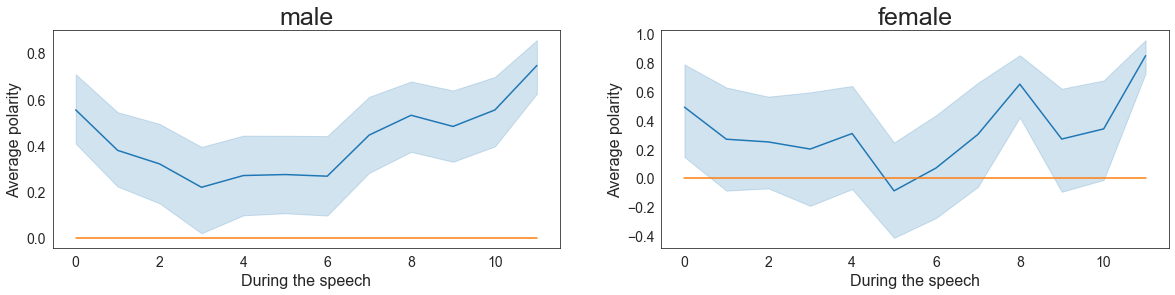

In [25]:
#Gender
plt.rcParams['figure.figsize'] = [20, 4]
sns.set_style("white")

num_plot = 2
categories = df.gender.unique()

figure, axes = plt.subplots(1,2)

for i in range(num_plot):    
    plt.subplot(1,2,i+1)
    subana1('gender',categories[i])
    plt.plot(np.arange(0,12), np.zeros(12))
    plt.xlabel('During the speech',fontsize=16)
    plt.ylabel('Average polarity',fontsize=16)
    plt.title(categories[i], fontdict = {'fontsize' : 25})    
plt.show()

## Rank

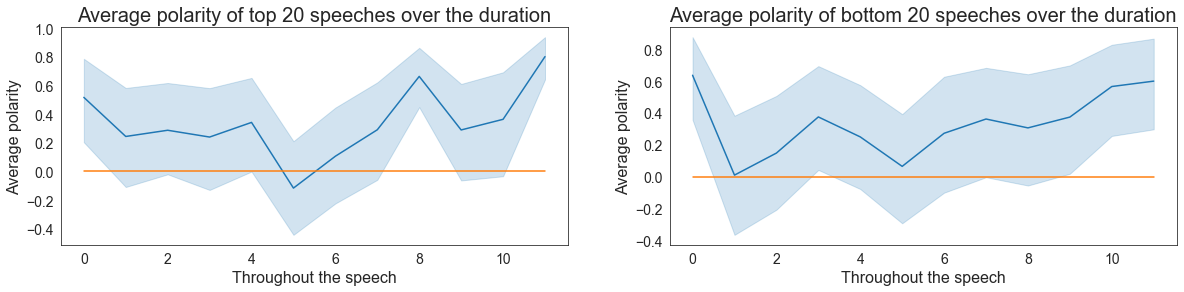

In [26]:
# rank
total_20 = pd.melt(total_pol[:20], id_vars='Contents')
fig,axes = plt.subplots(1,2)
plt.subplot(1,2,1)
sns.lineplot(data=total_20, x="variable", y="value")
plt.title('Average polarity of top 20 speeches over the duration',fontsize=20)
plt.ylabel('Average polarity',fontsize=16)
plt.xlabel('Throughout the speech',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.plot(np.arange(0,12),np.zeros(12))
total_80 = pd.melt(total_pol[80:], id_vars='Contents')
plt.subplot(1,2,2)
sns.lineplot(data=total_80, x="variable", y="value")
plt.title('Average polarity of bottom 20 speeches over the duration',fontsize=20)
plt.ylabel('Average polarity',fontsize=16)
plt.xlabel('Throughout the speech',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(np.arange(0,12),np.zeros(12))
